# Machine Learning Project
# Haberman

## importing relavant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         * 1 = the patient survived 5 years or longer
         * 2 = the patient died within 5 year

## Loading dataset

In [2]:
import pandas as pd

dataset = "haberman.csv"
nam = ['age_patient_operate_time', 'year_operate_time', 'axillary_node_num', 'survive_after5years']
myData = pd.read_csv(dataset, names=nam)
myData

,age_patient_operate_time,year_operate_time,axillary_node_num,survive_after5years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


Here's the typical order of operations in a machine learning project:

1. Data Collection: Gather our dataset.

2. Data Preprocessing:
    * Handle missing values (if any).
    * Encoding categorical variables (if applicable).
    * Feature engineering (if needed).
    * Scaling numerical features.<br><br>

3. Data Splitting: Split the data into training and testing sets.

4. Model Building: Choose a machine learning model and train it on the training data.

5. Model Evaluation: Evaluate the model's performance on the testing data.

6. Model Tuning: Adjust hyperparameters and make other model improvements based on evaluation results.

7. Final Model: Train the final model on the entire dataset (including training and testing data).

8. Inference: Use the final model for predictions on new, unseen data.

Source link: https://www.linkedin.com/pulse/unlock-power-machine-learning-data-science-ai-inbuiltdata-1f/

## Explore the Dataset

In [3]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age_patient_operate_time  306 non-null    int64
 1   year_operate_time         306 non-null    int64
 2   axillary_node_num         306 non-null    int64
 3   survive_after5years       306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [4]:
myData.describe()

,age_patient_operate_time,year_operate_time,axillary_node_num,survive_after5years
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


## Data Preprocessing:
Since there are no missing values in our dataset and all the features are numerical, there's no need to handle missing values or encode categorical features. However, there are a few optional preprocessing steps we can consider:

## Missing values

In [5]:
import numpy as np

myData.isna().sum()

age_patient_operate_time    0
year_operate_time           0
axillary_node_num           0
survive_after5years         0
dtype: int64

## Visualization 

### Pie chart to show the percentage of survival 

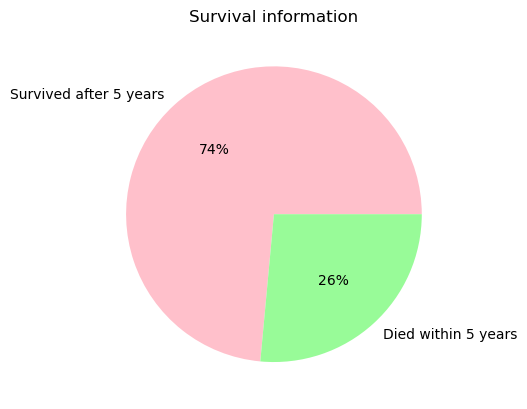

In [6]:
import matplotlib.pyplot as plt

sur = myData["survive_after5years"].value_counts()

plt.pie(x=sur, labels=["Survived after 5 years", "Died within 5 years"], colors=["#FFC0CB", "#98FB98"], autopct="%1.0f%%")
plt.title("Survival information")

plt.show()

In [7]:
# Count the number of data points for each class.
# This dataset is imbalanced, with significantly different data point counts for each class.
# Strategies for handling imbalanced data will be explored later.
myData.survive_after5years.value_counts()

survive_after5years
1    225
2     81
Name: count, dtype: int64

### Scatter plot to visualize the age distribution


Youngest patient was 30 old.
Oldest patient was 83 old.
Mean of the ages in patients was 52.5 years.


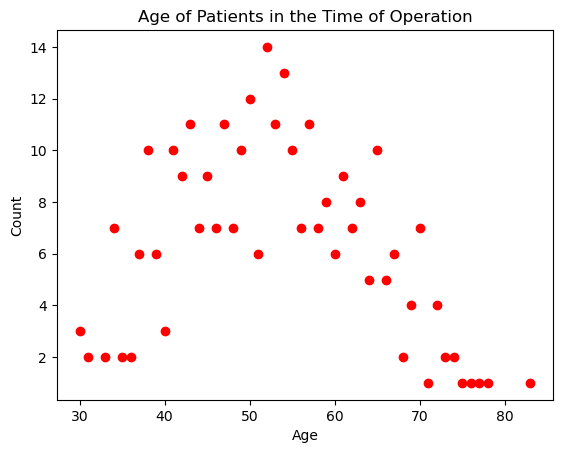

In [8]:
age = myData["age_patient_operate_time"].value_counts().sort_index()

# Extract ages (x-axis) and counts (y-axis)
ages = age.index
counts = age.values

# Create a scatter plot
plt.scatter(ages, counts, color="red")  # You can adjust the color as needed
plt.title("Age of Patients in the Time of Operation")
plt.xlabel("Age")
plt.ylabel("Count")


print(f"Youngest patient was {myData['age_patient_operate_time'].min()} old.")
print(f"Oldest patient was {myData['age_patient_operate_time'].max()} old.")
print(f"Mean of the ages in patients was {myData['age_patient_operate_time'].mean():.1f} years.")

plt.show()

## Feature Scaling:
Depending on the machine learning algorithm we plan to use, it might be beneficial to scale our features. Feature scaling can help algorithms converge faster and perform better. Common scaling methods are Min-Max scaling (scaling features to a range of [0, 1]) and standardization (scaling features to have a mean of 0 and a standard deviation of 1). I use the StandardScaler from Scikit-Learn for this:

## Feature Selection:

Feature scaling is an important thing we do before teaching computers to learn from data. It's like making sure all the numbers in our data are on the same scale. This helps our computer learn without favoring big numbers over small ones. Feature scaling is extra important when our data has numbers that cover a wide range. Let's see why feature scaling is so important and when we should use it.

1. Equalizing the Impact of Features:

Some computer programs that learn from data use measurements that involve distances, like how far apart things are. But when these measurements involve numbers that are very different, it can cause problems. For example, if one number is between 0 and 1, and another number is between 0 and 1000, the big number can have too much control over the program. Feature scaling is a way to fix this issue and make sure all the numbers have a fair say in the program's decisions.

2. Faster Convergence:

Methods that use gradients, such as gradient descent, work better when you adjust the size of your features. When you don't do this adjustment, the process of finding the best solution might be slower and not very steady.

3. Improved Model Performance:

Some methods, such as linear regression and K-Means clustering, can be affected by how big or small the numbers in the data are. To make these methods work better and give more accurate predictions, you can adjust the size of the numbers in the data.

4. Interpretability:

Scaling features makes it easier to understand how different features affect a model and which ones are more important. When features have very different sizes, figuring out their importance can be tricky.

When should we use feature scaling:

* If we're using algorithms that depend on measuring distances or gradient descent for improving the model (like K-Nearest Neighbors, Support Vector Machines, K-Means clustering, Principal Component Analysis).
* When our data has features with different types of measurements or units.
* When we want to improve how well our machine learning model works and how quickly it learns.
* If we're using techniques that punish large coefficient values (like L1 and L2 regularization).


Common Feature Scaling Methods:

Several common methods for feature scaling include:

1. Standardization (Z-score normalization):

Rescales the data to have a mean of 0 and a standard deviation of 1. It is advantageous when the data approximates a normal distribution.

2. Min-Max Scaling:

Transforms data to a specified range, often [0, 1] or [-1, 1], while preserving the original data distribution.

3. Robust Scaling:

This method adjusts data by using the middle value and the range between the middle 50% of the numbers. It helps data not be affected too much by unusual or extreme numbers.
When we decide how to adjust our data, think about the kind of data we have and the needs of the machine learning we're using. To make the best choice, see how adjusting the data affects our model's performance for our specific dataset and problem.

For example imagine we have a list of people's salaries in a company. Some people earn really high salaries, like the CEO, while others earn average salaries. Now, if we want to find the average salary for the company, we could just add up all the salaries and divide by the number of people. But, this method can be heavily influenced by the CEO's extremely high salary. So, our average salary might not really represent what most people in the company earn. To avoid this problem, we can use a method that looks at the middle values, like the median (which is the middle number when all salaries are lined up from lowest to highest) and the range between the salaries in the middle 50% (this means the range between the 25th percentile and the 75th percentile). These middle values are less affected by extreme salaries, making our calculation more robust or resistant to these outliers.

Now, when we're deciding how to calculate averages or use this method in machine learning, we should consider the type of data we have (like salary data in this example) and the needs of our specific machine learning task. We want to choose the method that makes the most sense for our situation. To do that, we should see how the method we choose affects the performance of our machine learning model on our specific data and problem.

Source link: https://towardsdatascience.com/what-is-feature-scaling-why-is-it-important-in-machine-learning-2854ae877048


In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_features = ['age_patient_operate_time', 'year_operate_time', 'axillary_node_num']
myData[numerical_features] = scaler.fit_transform(myData[numerical_features])


### Encoding Categorical Variables
In our dataset, it appears that 'survive_after5years' is a categorical variable with two classes (1 and 2). We must convert it to a binary variable (e.g., 0 for survival status 1 and 1 for survival status 2) if we're performing binary classification.

In [10]:
myData['survive_after5years'] = myData['survive_after5years'].map({1: 0, 2: 1})

# Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance
print(feature_importance_df)